In [15]:
### 1 . IMPORTING LIBRARIES
# install packages first in order to be able to install libraries
!pip3 install pandas
# You will now be able to import required libraries
import pandas as pd         # data manipulation & analysis
import numpy as np          # numerical & mathematical operations
import matplotlib.pyplot as plt         # for creating visualisations
import seaborn as  sns          # for more advanced visualisations 

In [16]:
# Load data from a CSV file into a DataFrame
# pd.read_csv('file_path') 
df = pd.read_csv('cleaned_file.csv')

# To view FIRST 5 rows
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [17]:
# To view LAST 5 rows
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
54961,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
54962,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
54963,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
54964,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
54965,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


In [20]:
# Data Cleaning
# 1. Standardizing column names
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# 2. Standardizing text fields
df['name'] = df['name'].str.title()
df['gender'] = df['gender'].str.capitalize()
df['blood_type'] = df['blood_type'].str.upper()
df['medical_condition'] =df['medical_condition'].str.capitalize()
df['doctor'] = df['doctor'].str.title()
df['hospital'] = df['hospital'].str.title()
df['insurance_provider'] = df['insurance_provider'].str.title()
df['admission_type'] = df['admission_type'].str.capitalize()
df['medication'] = df['medication'].str.capitalize()

# 3. Check for duplicates
duplicates_count = df.duplicated().sum()

# 4. Check for missing values
missing_values = df.isnull().sum()

# Summary statistics for numerical columns
summary_stats = df.describe()

# Display results
duplicates_count, missing_values, summary_stats


(np.int64(0),
 name                  0
 age                   0
 gender                0
 blood_type            0
 medical_condition     0
 date_of_admission     0
 doctor                0
 hospital              0
 insurance_provider    0
 billing_amount        0
 room_number           0
 admission_type        0
 discharge_date        0
 medication            0
 test_results          0
 age_group             0
 dtype: int64,
                 age  billing_amount   room_number
 count  54966.000000    54966.000000  54966.000000
 mean      51.535185    25544.306284    301.124404
 std       19.605661    14208.409711    115.223143
 min       13.000000    -2008.492140    101.000000
 25%       35.000000    13243.718641    202.000000
 50%       52.000000    25542.749145    302.000000
 75%       68.000000    37819.858159    401.000000
 max       89.000000    52764.276736    500.000000)

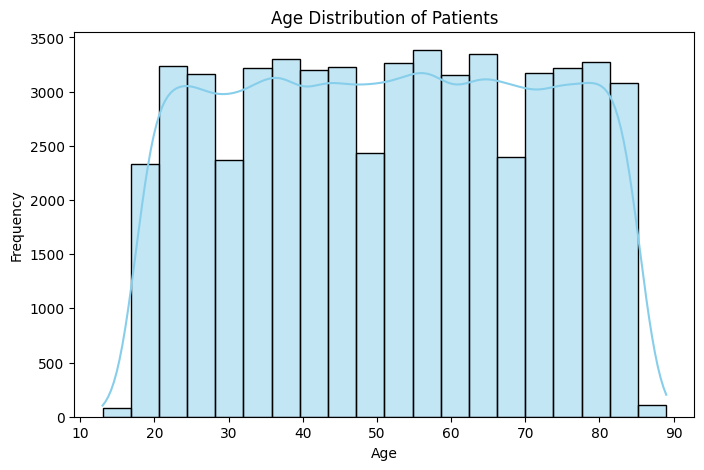

C:\Users\zarap\AppData\Local\Temp\ipykernel_27044\3860159167.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


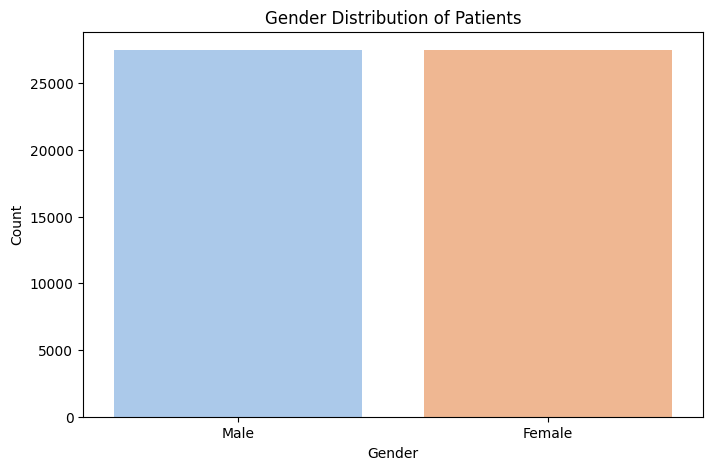

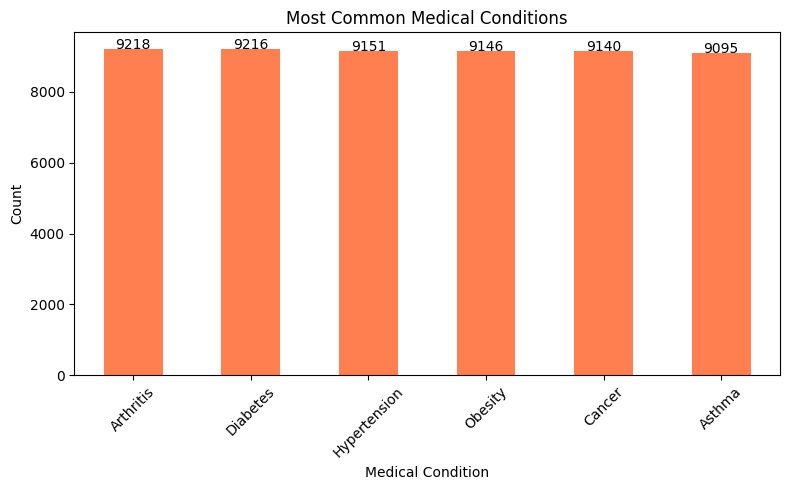

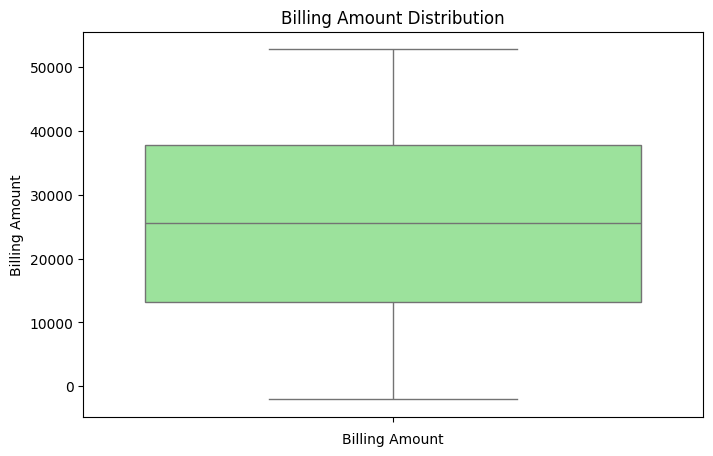

In [18]:
# Distribution of patient age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title("Gender Distribution of Patients")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Most common medical conditions
plt.figure(figsize=(8, 5))
bar_plot = df['Medical Condition'].value_counts().plot(kind='bar', color='coral')

# Adding values to the bars
for bar in bar_plot.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position in the center of the bar
        bar.get_height() + 2,              # Slightly above the top of the bar
        f'{int(bar.get_height())}',        # The value as an integer
        ha='center',                       # Horizontal alignment
        fontsize=10,                       # Font size
        color='black'                      # Font color
    )

plt.title("Most Common Medical Conditions")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Distribution of billing amounts
plt.figure(figsize=(8, 5))
sns.boxplot(df['Billing Amount'], color='lightgreen')
plt.title("Billing Amount Distribution")
plt.xlabel("Billing Amount")
plt.show()

C:\Users\zarap\AppData\Local\Temp\ipykernel_27044\3075170759.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age Group', palette='viridis', order=age_labels)


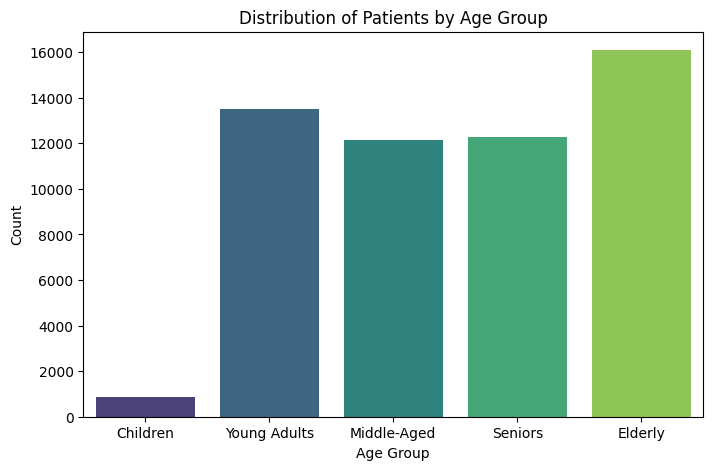

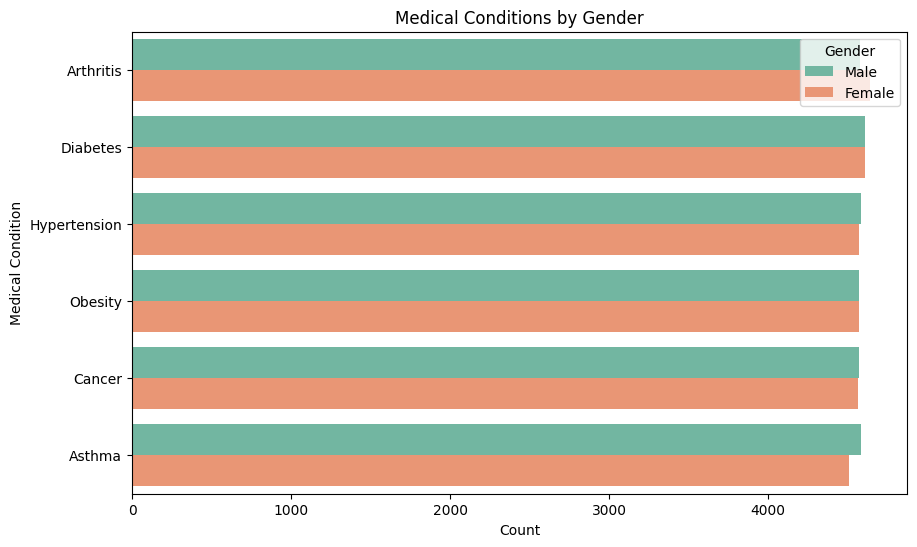

C:\Users\zarap\AppData\Local\Temp\ipykernel_27044\3075170759.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Admission Type', y='Billing Amount', palette='coolwarm')


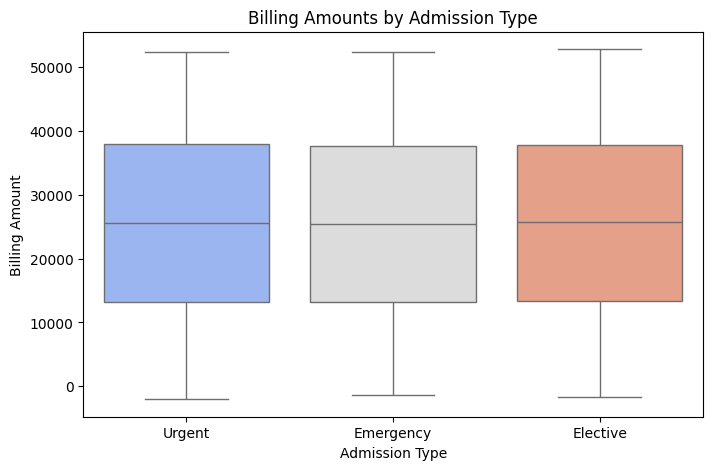

C:\Users\zarap\AppData\Local\Temp\ipykernel_27044\3075170759.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Insurance Provider', y='Billing Amount', palette='muted')


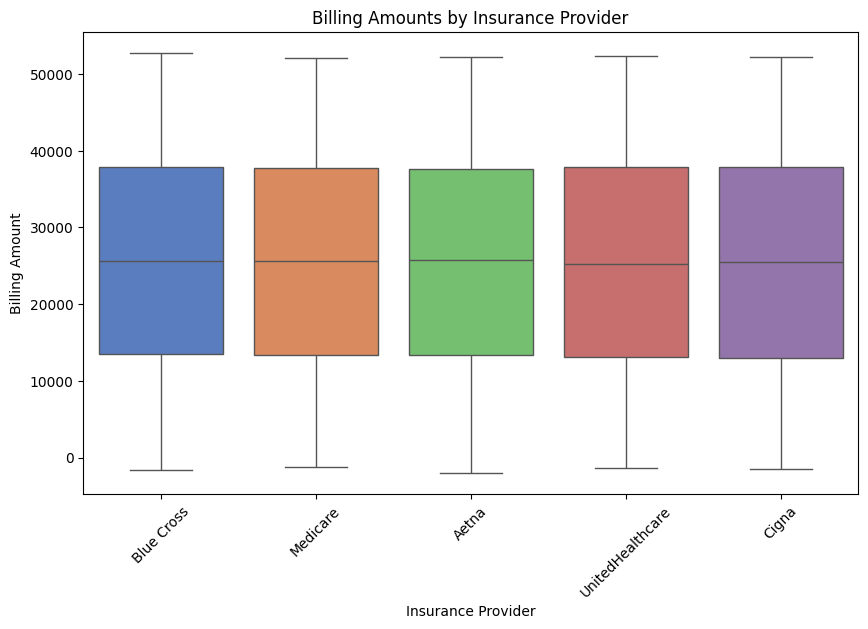

C:\Users\zarap\AppData\Local\Temp\ipykernel_27044\3075170759.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Insurance Provider', palette='pastel', order=df['Insurance Provider'].value_counts().index)


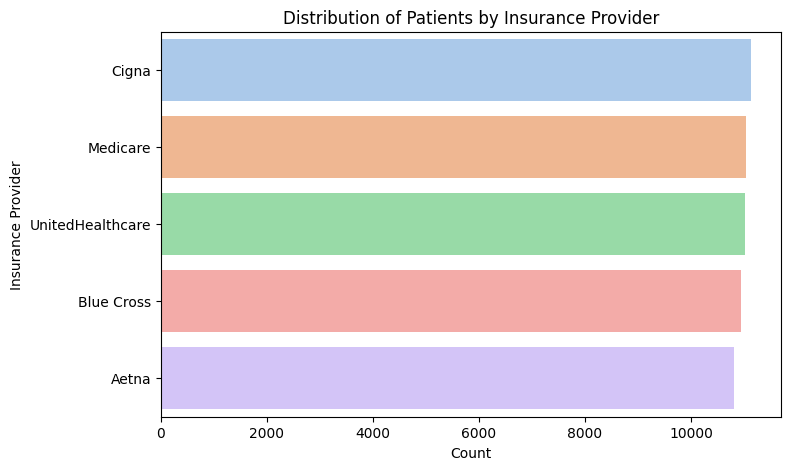

In [19]:
# Grouping ages into categories
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['Children', 'Young Adults', 'Middle-Aged', 'Seniors', 'Elderly']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Age distribution by age group
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Age Group', palette='viridis', order=age_labels)
plt.title("Distribution of Patients by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# Gender vs. Medical Condition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Medical Condition', hue='Gender', palette='Set2', order=df['Medical Condition'].value_counts().index)
plt.title("Medical Conditions by Gender")
plt.xlabel("Count")
plt.ylabel("Medical Condition")
plt.legend(title="Gender")
plt.show()

# Billing amount by admission type
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Admission Type', y='Billing Amount', palette='coolwarm')
plt.title("Billing Amounts by Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Billing Amount")
plt.show()

# Billing amount by insurance provider
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Insurance Provider', y='Billing Amount', palette='muted')
plt.title("Billing Amounts by Insurance Provider")
plt.xlabel("Insurance Provider")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45)
plt.show()

# Distribution of patients by insurance provider
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Insurance Provider', palette='pastel', order=df['Insurance Provider'].value_counts().index)
plt.title("Distribution of Patients by Insurance Provider")
plt.xlabel("Count")
plt.ylabel("Insurance Provider")
plt.show()

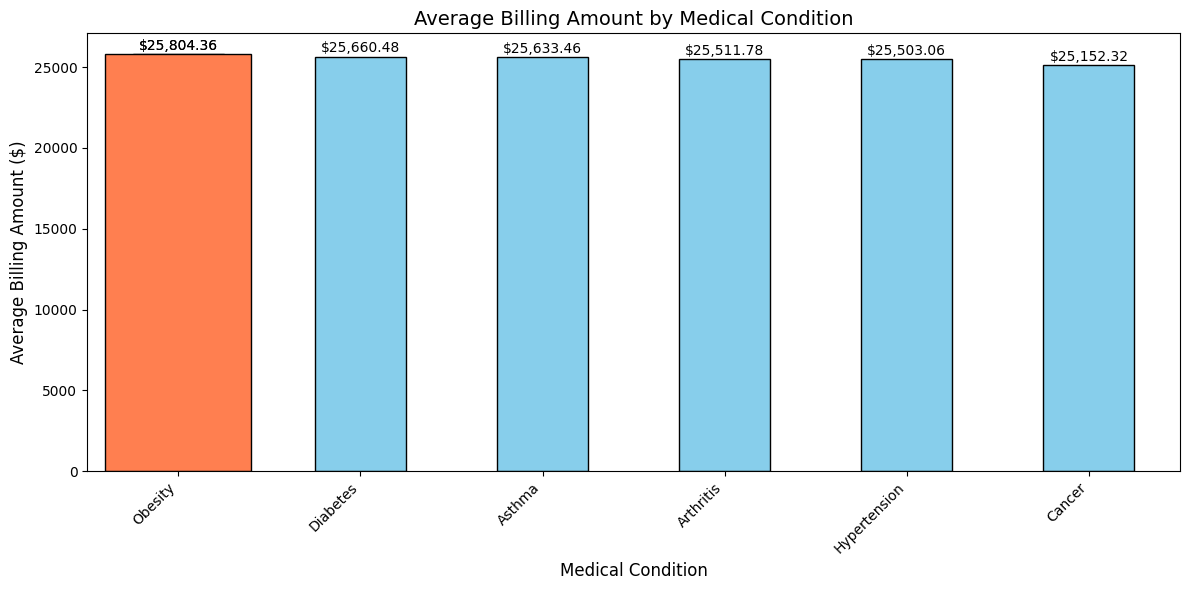

In [23]:
# Visualizing the average billing amount by medical condition with horizontal values
plt.figure(figsize=(12, 6))
average_billing_by_condition.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Highlighting the highest bar
highest_condition = average_billing_by_condition.index[0]
plt.bar(highest_condition, average_billing_by_condition[highest_condition], color='coral', edgecolor='black')

# Adding title and labels
plt.title("Average Billing Amount by Medical Condition", fontsize=14)
plt.xlabel("Medical Condition", fontsize=12)
plt.ylabel("Average Billing Amount ($)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding horizontal values on top of bars
for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # Center of the bar
        bar.get_height() + 500,             # Above the bar
        f"${bar.get_height():,.2f}",        # Format value as currency
        ha='center', va='center', fontsize=10, rotation=0  # Horizontal values
    )

plt.show()


C:\Users\zarap\AppData\Local\Temp\ipykernel_27044\3792522520.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_admission_custom_data = df.groupby(['age_group_custom', 'admission_type']).size().unstack()


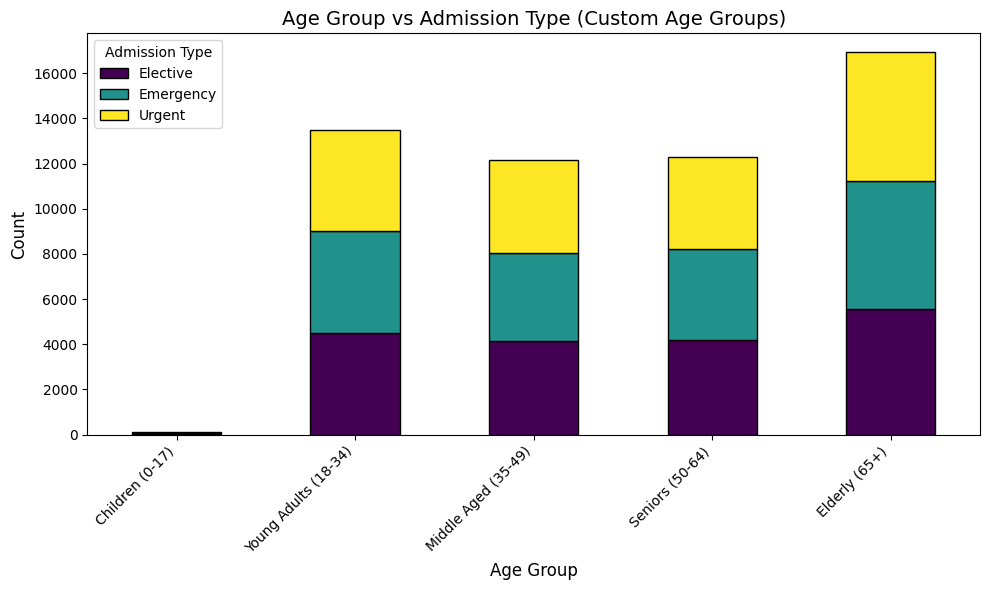

In [25]:
# Define new age groups for the analysis
bins = [0, 17, 34, 49, 64, 100]
labels = ['Children (0-17)', 'Young Adults (18-34)', 'Middle Aged (35-49)', 'Seniors (50-64)', 'Elderly (65+)']
df['age_group_custom'] = pd.cut(df['age'], bins=bins, labels=labels)

# Group data by new Age Group and Admission Type
age_admission_custom_data = df.groupby(['age_group_custom', 'admission_type']).size().unstack()

# Plot Age Group vs Admission Type with custom age groups
age_admission_custom_data.plot(kind='bar', figsize=(10, 6), stacked=True, colormap='viridis', edgecolor='black')

# Adding titles and labels
plt.title("Age Group vs Admission Type (Custom Age Groups)", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Admission Type", fontsize=10)
plt.tight_layout()

plt.show()
